In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/adult.csv') #reading and loading dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# dropping any null values
df = df.copy().dropna()
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [5]:
#df
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns
#
## Replace missing values of numerical columns with mean
df_numerical_imputed = df.copy()
df_numerical_imputed[numerical_columns] = df_numerical_imputed[numerical_columns].replace('?', df_numerical_imputed[numerical_columns].astype(float).mean())
#
# Replace missing values of categorical columns with mode
df_categorical_imputed = df.copy()
df_categorical_imputed[categorical_columns] = df_categorical_imputed[categorical_columns].replace('?', df_categorical_imputed[categorical_columns].mode().iloc[0])
#
#
df_mean_imputed = pd.concat([df_numerical_imputed[numerical_columns], df_categorical_imputed[categorical_columns]], axis=1)
#
print(df_mean_imputed.isnull().sum())



age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
workclass          0
education          0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
native-country     0
income             0
dtype: int64


In [6]:
df=df_mean_imputed
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,89814,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,336951,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,160323,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,18,103497,10,0,0,30,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,154374,9,0,0,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,151910,9,0,0,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,201490,9,0,0,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


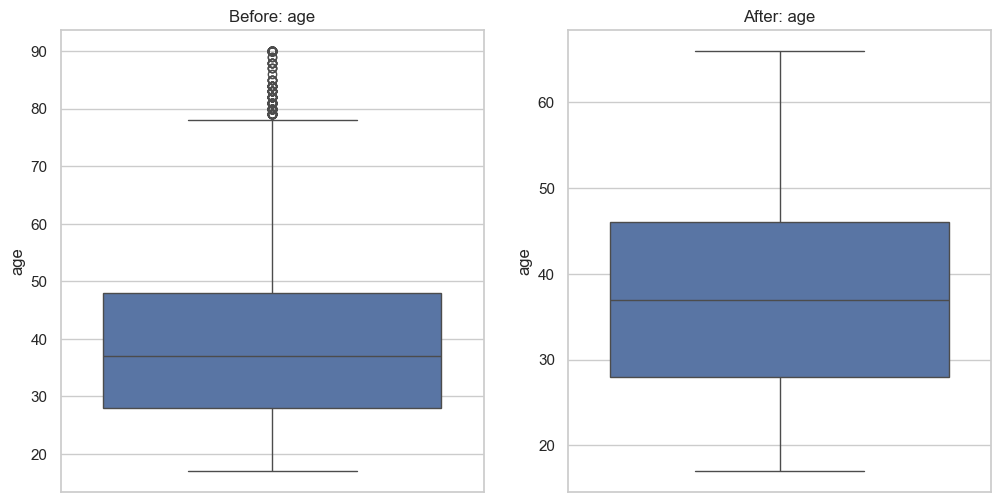

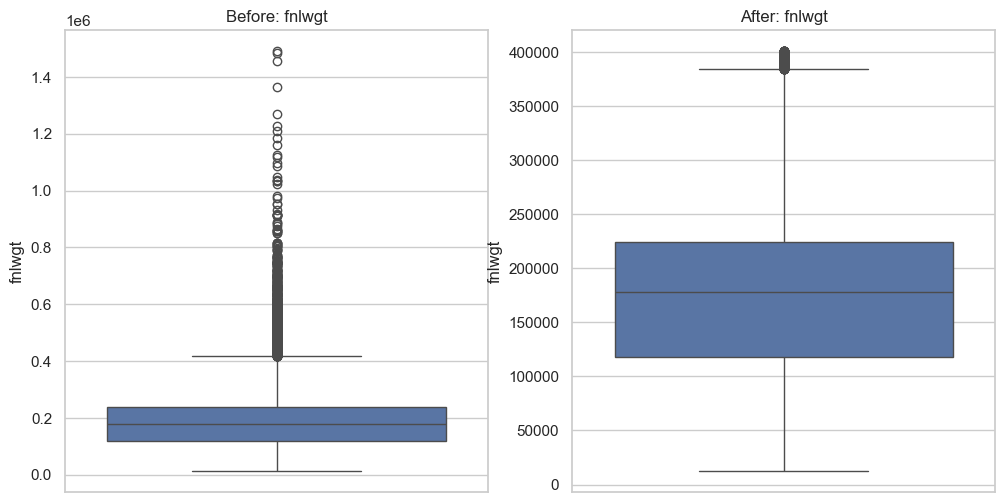

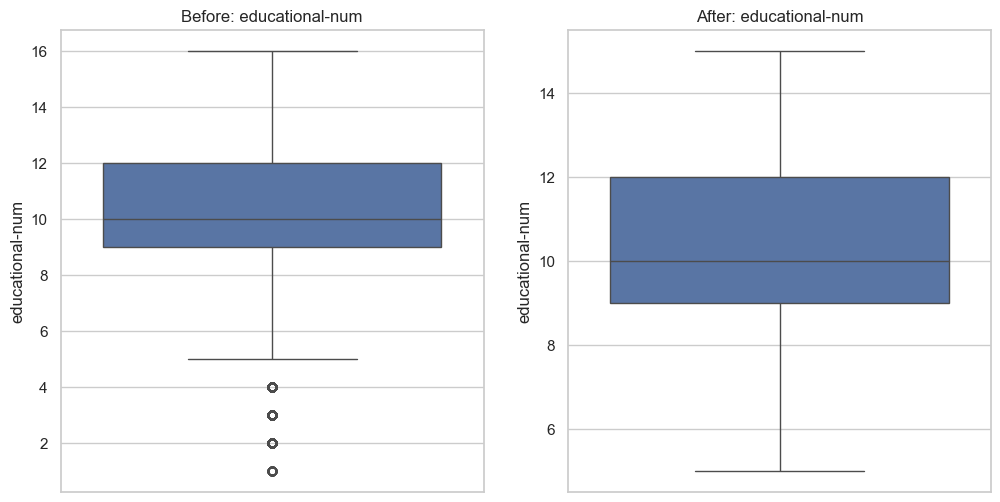

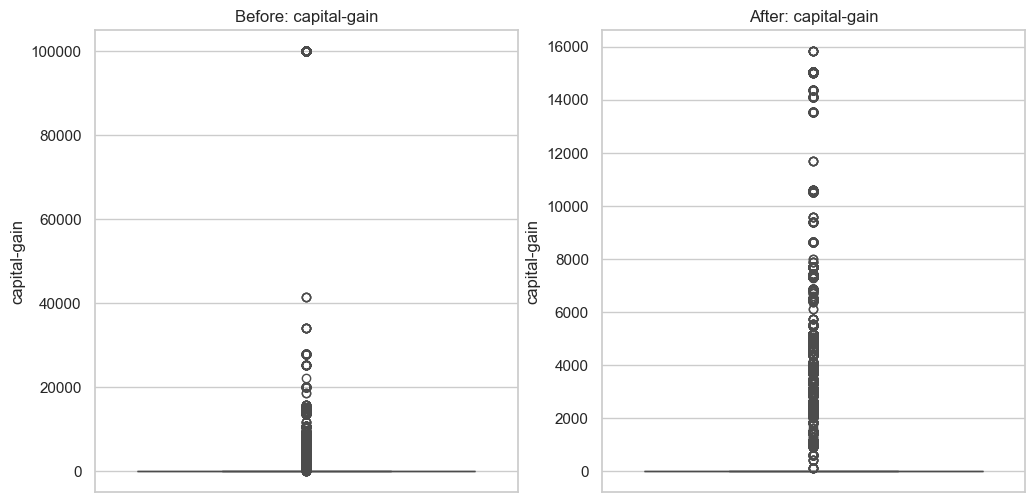

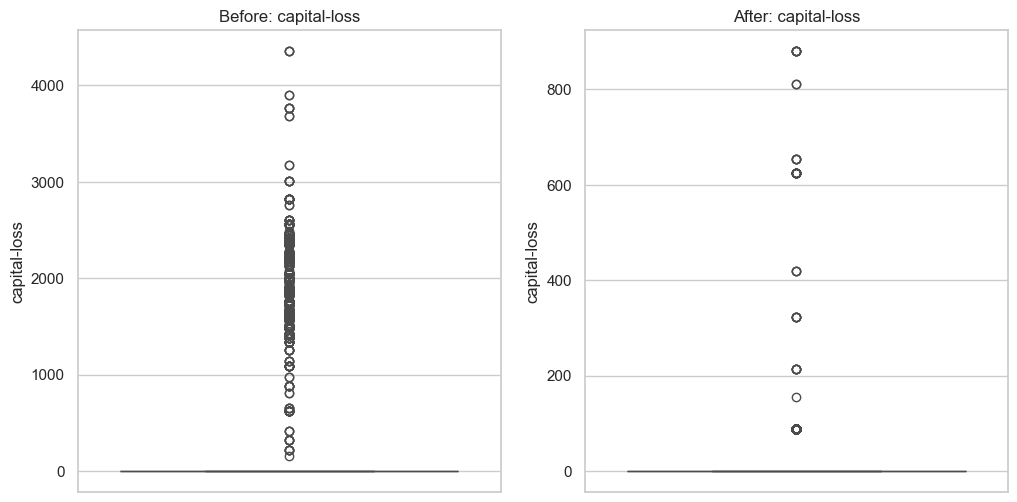

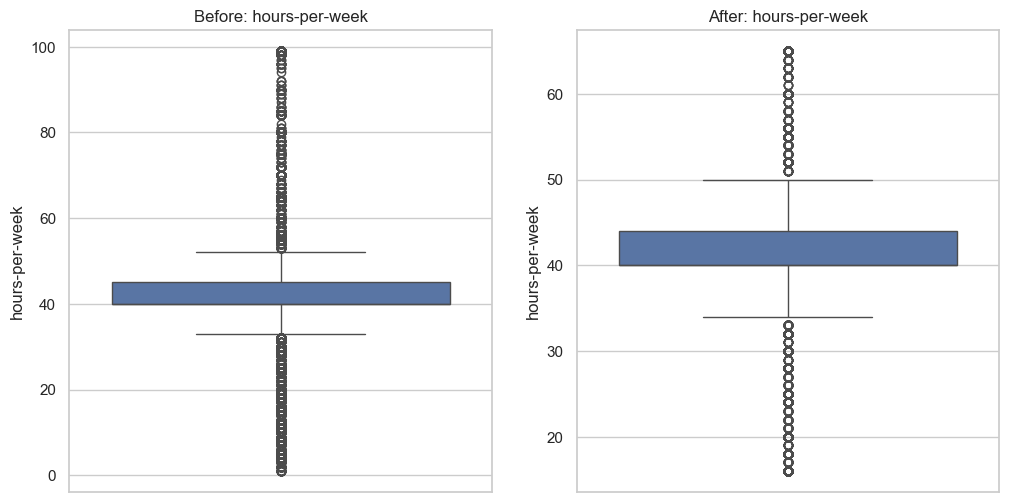

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style='whitegrid')

# Iterate over each numerical column in the DataFrame
for column in numerical_columns:
    # Calculate the mean and standard deviation of the column
    mean = df[column].mean()
    std = df[column].std()

    # Identify outliers
    outliers = (df[column] < (mean - 2 * std)) | (df[column] > (mean + 2 * std))

    # Create a copy of the DataFrame for before and after comparison
    df_before = df.copy()

    # Plot before handling outliers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(y=df_before[column])
    plt.title(f'Before: {column}')

    # Replace outliers in the original DataFrame for 'after' visualization
    if df[column].dtype.kind in 'iu':
        df.loc[outliers, column] = int(mean)
    else:
        df.loc[outliers, column] = mean

    # Plot after handling outliers
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(y=df[column])
    plt.title(f'After: {column}')

    plt.show()


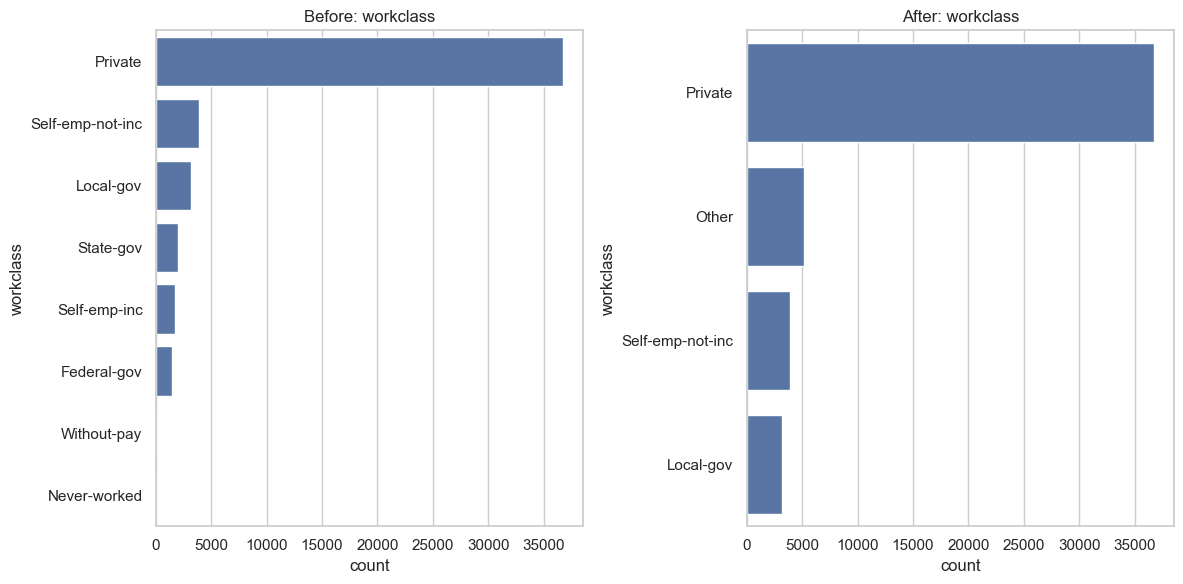

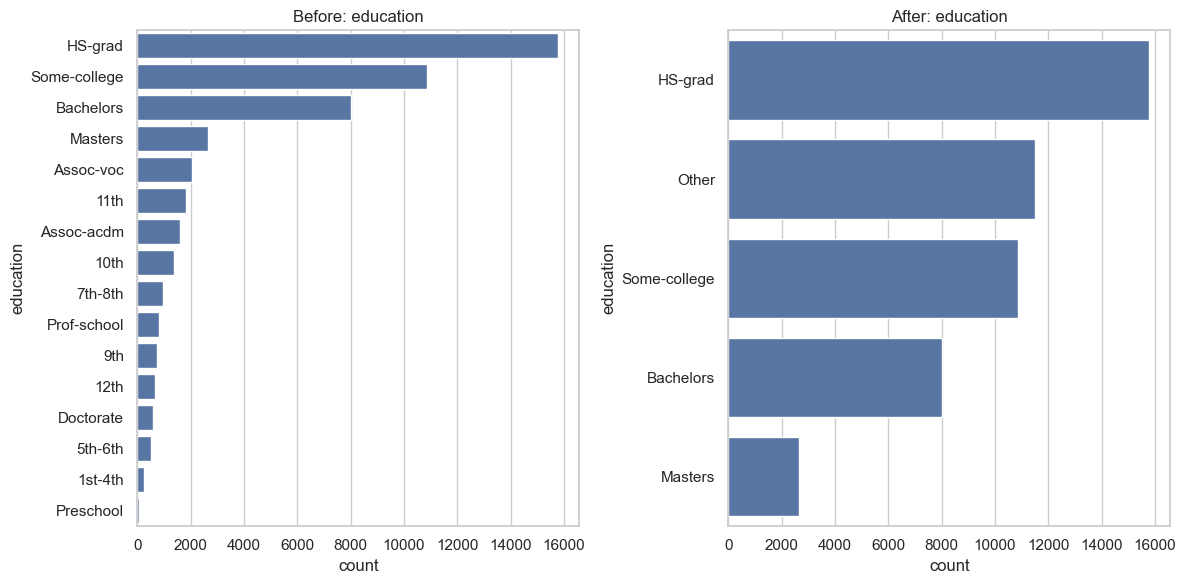

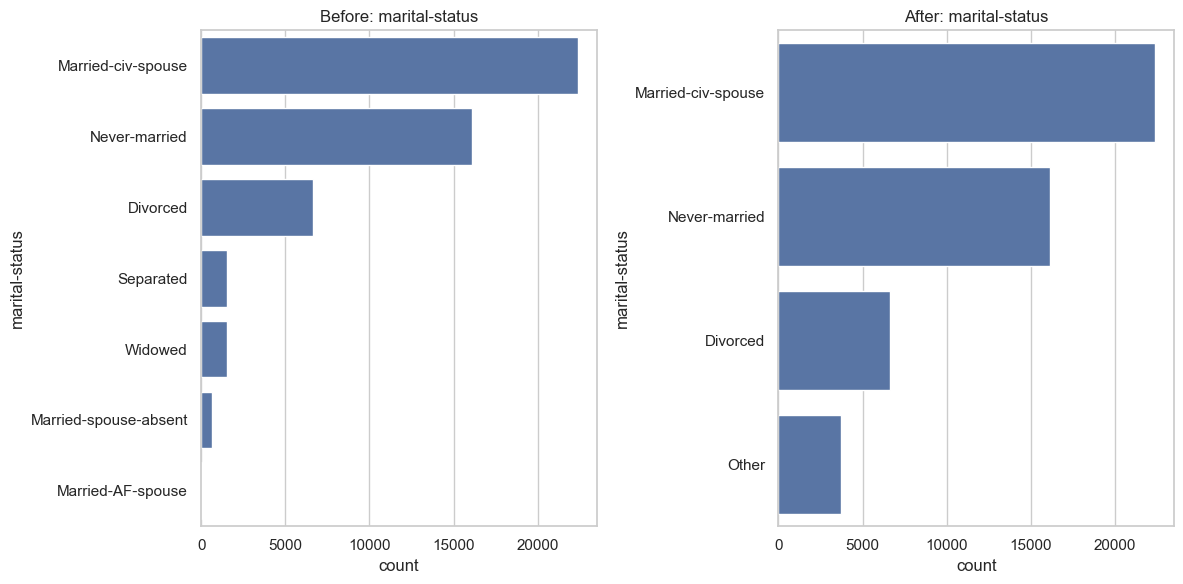

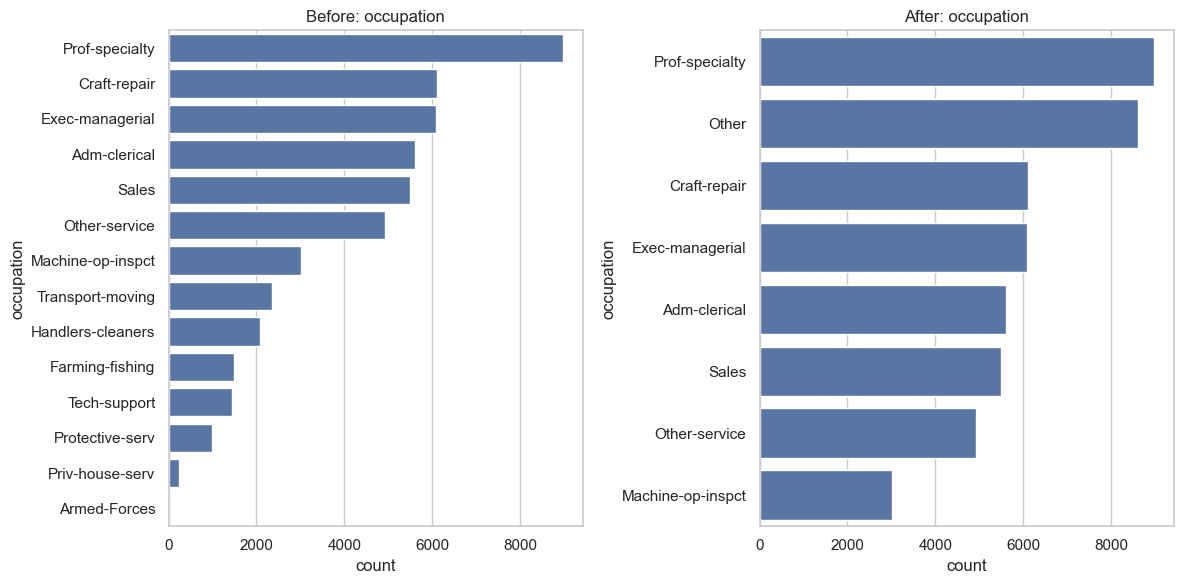

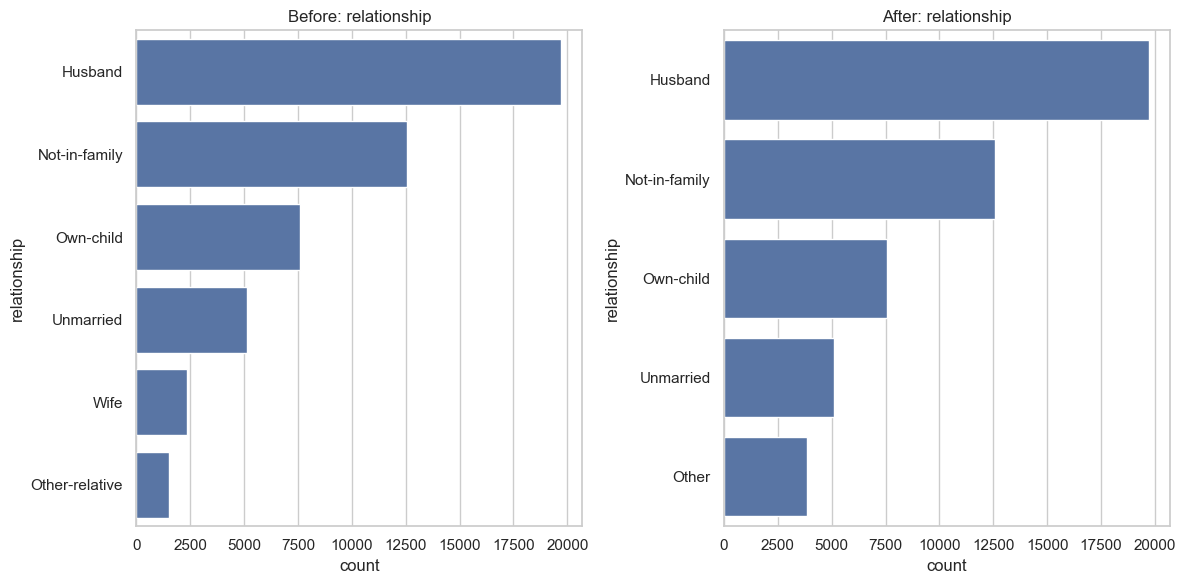

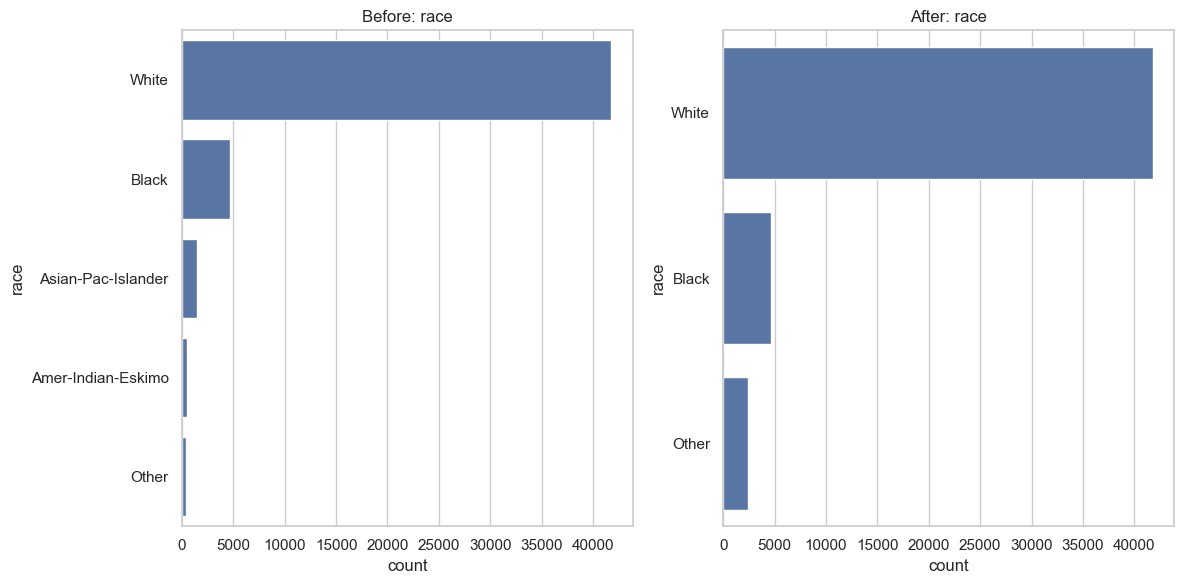

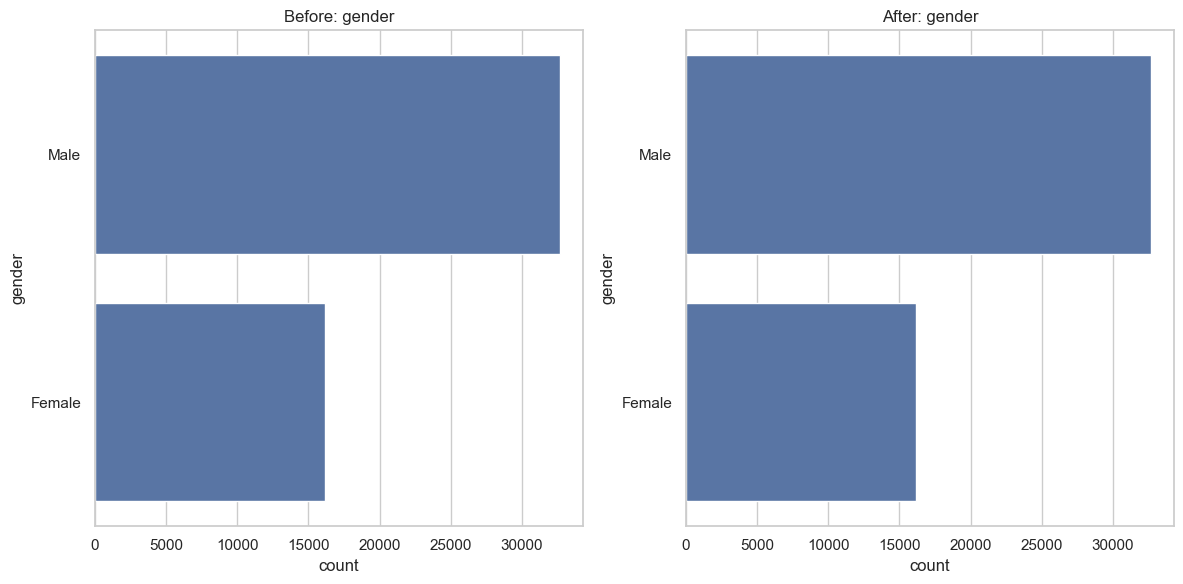

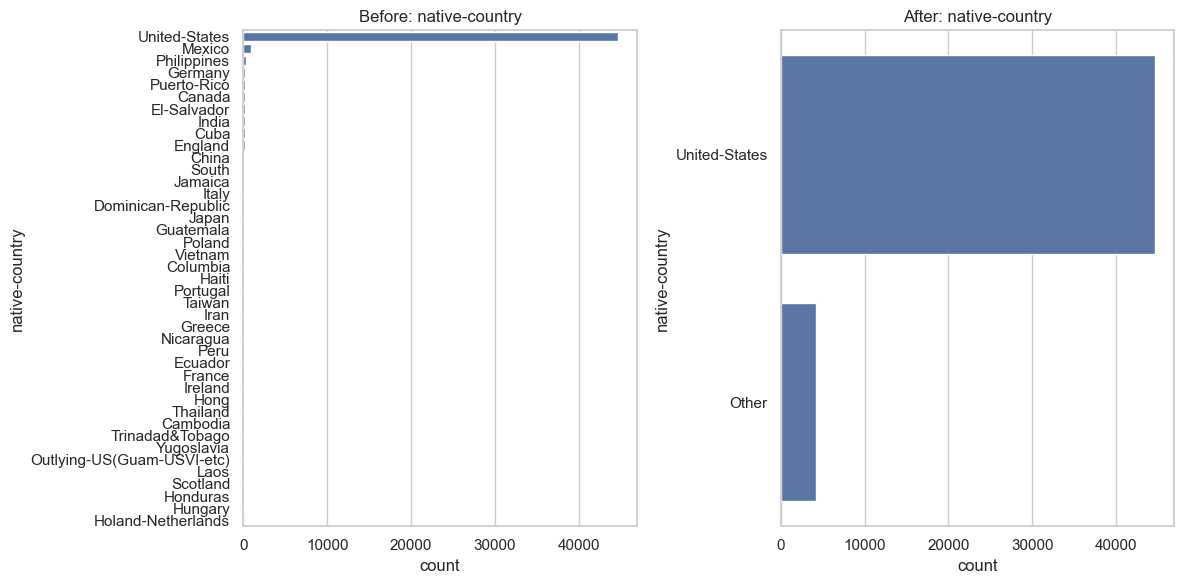

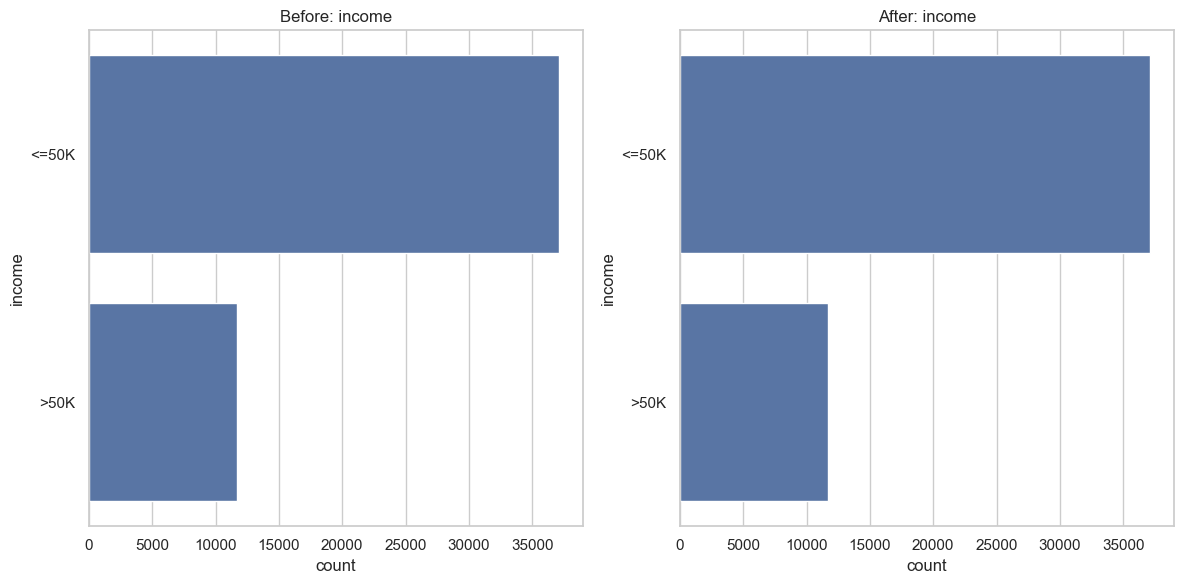

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style='whitegrid')

# Define a threshold for rare categories, for example, categories that constitute less than 5% of the data
threshold_percentage = 5

# Iterate over each categorical column in the DataFrame
for column in categorical_columns:
    # Calculate the frequency of each category
    frequency = df[column].value_counts(normalize=True) * 100  # percentages

    # Identify rare categories
    rare_categories = frequency[frequency < threshold_percentage].index

    # Create a copy of the DataFrame for before and after comparison
    df_before = df.copy()

    # Plot before handling rare categories
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.countplot(y=df_before[column], order=df_before[column].value_counts().index)
    plt.title(f'Before: {column}')
    plt.tight_layout()

    # Replace rare categories in the original DataFrame for 'after' visualization
    df[column] = df[column].replace(rare_categories, 'Other')

    # Plot after handling rare categories
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'After: {column}')
    plt.tight_layout()

    plt.show()


In [9]:
#categorical_columns = df.select_dtypes(include=['int64']).columns
#print(categorical_columns)
#for x in categorical_columns:
#    print(df[x].mean())
#
#
## For categorical columns, find the most repeated value
#categorical_columns = df.select_dtypes(include=['object']).columns
#most_repeated_values = {}
#for col in categorical_columns:
#    most_repeated_value = df[col].mode()[0]
#    most_repeated_values[col] = most_repeated_value
#
#print("Most repeated value for each categorical column:")
#for col, value in most_repeated_values.items():
#    print(f"{col}: {value}")
#This code will print the mean value for each numeri

***ENCODING***


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column data type is object (categorical)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])

# Display the modified DataFrame
print(df)


       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  workclass  education  marital-status  occupation  \
0                  40          2          3               2           3   
1                  50          2          1  

In [11]:
#lets find out the unique categories in the column maritial0status
#Ordinal Encoding 
#unique_categories = df['marital-status'].unique()
#print("Unique categories:", unique_categories)
#

In [12]:
#mapping these categories into integers


In [13]:
#mapping = {
#    'Never-married': 1,
#    'Married-civ-spouse': 2,
#    'Divorced': 3,
#    'Married-spouse-absent': 4,
#    'Separated': 5,
#    'Married-AF-spouse': 6,
#    'Widowed': 7
#}

In [14]:
#apply mapping to dataframe

In [15]:
#df['marital-status-encoded'] = df['marital-status'].map(mapping)

In [16]:
#df['marital-status-encoded']

In [17]:
#dropping the original 'marital-status' column as we no longer need it
#df.drop(columns=['marital-status'], inplace=True)

In [18]:
#df

In [19]:
# let's now focus on the work-class

In [20]:
#unique_categories_workclass = df['workclass'].unique()
#print("Unique categories in workclass:", unique_categories_workclass)

In [21]:
# Step 2: Create Dummy Variables
# Use pandas.get_dummies() function to create dummy variables
#dummy_variables_workclass = pd.get_dummies(df['workclass'], prefix='workclass')

In [22]:
#print(dummy_variables_workclass)

In [23]:
# Step 3: Merge Dummy Variables with the Original DataFrame
# Concatenate the original DataFrame with the dummy variables DataFrame
#df = pd.concat([df, dummy_variables_workclass], axis=1)



In [24]:
## Optionally, you can drop the original 'workclass' column if you no longer need it
#df.drop(columns=['workclass'], inplace=True)
#
## Display the DataFrame to verify the changes
#print(df.head())

In [25]:
# let's now focus on the occupation

In [26]:
#unique_categories_occupation = df['occupation'].unique()

In [27]:
#print(unique_categories_occupation)

In [28]:
#dummy_variables_occupation = pd.get_dummies(df['occupation'], prefix='occupation')
#dummy_variables_occupation

In [29]:
#adding the dummy variables columns of occupation with our orignial df 
#df = pd.concat([df, dummy_variables_occupation], axis=1)

In [30]:
#df.drop(columns=['occupation'], inplace=True)

In [31]:
#df

In [32]:
#df.info()

In [33]:
#unique_categories_relationship = df['relationship'].unique()
#print("Unique categories in relationship:", unique_categories_relationship)
#
#unique_categories_race = df['race'].unique()
#print("Unique categories in race:", unique_categories_race)
#
#unique_categories_sex = df['gender'].unique()
#print("Unique categories in sex:", unique_categories_sex)
#
#unique_categories_native_country = df['native-country'].unique()
#print("Unique categories in native-country:", unique_categories_native_country)
## For 'relationship'
#dummy_variables_relationship = pd.get_dummies(df['relationship'], prefix='relationship')
#df = pd.concat([df, dummy_variables_relationship], axis=1)
#df.drop(columns=['relationship'], inplace=True)
#
## For 'race'
#dummy_variables_race = pd.get_dummies(df['race'], prefix='race')
#df = pd.concat([df, dummy_variables_race], axis=1)
#df.drop(columns=['race'], inplace=True)
#
## For 'sex'
#dummy_variables_sex = pd.get_dummies(df['gender'], prefix='gender')
#df = pd.concat([df, dummy_variables_sex], axis=1)
#df.drop(columns=['gender'], inplace=True)
#
## For 'native-country'
#dummy_variables_native_country = pd.get_dummies(df['native-country'], prefix='native-country')
#df = pd.concat([df, dummy_variables_native_country], axis=1)
#df.drop(columns=['native-country'], inplace=True)
#
## Display the DataFrame to verify the changes
#print(df.head())

In [34]:
#df.info()

In [35]:
#for income column
#unique_category_income = df['income'].unique()
#unique_category_income

In [36]:
#dummy_variable_income = pd.get_dummies(df['income'], prefix='income')
#print(dummy_variable_income)

In [37]:
#df = pd.concat([df, dummy_variable_income],axis =1)
#df.drop(columns=['income'], inplace=True)

In [38]:
#df

In [39]:
##df.info()

feature removing


In [40]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor
import numpy as np

# Assuming df is your data frame after preprocessing

# 1. Remove columns with more than 70% null values
threshold_null = 0.7 * len(df)
df = df.dropna(thresh=threshold_null, axis=1)

# 2. Remove highly correlated features
# Calculate the correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
# Drop the highly correlated features
df = df.drop(to_drop, axis=1)

# 3. Apply RFECV
# Initialize a classifier or regressor based on your target variable nature
estimator = RandomForestClassifier(random_state=42)  # or RandomForestRegressor for regression problems
# Initialize RFECV
selector = RFECV(estimator, step=1, cv=5)
# Fit RFECV
X = df.drop(columns=['income'])  # Assuming 'income' is your target variable
y = df['income']
selector = selector.fit(X, y)

# Transform the dataset
X_transformed = selector.transform(X)

# Get the support and ranking of the features
print("Features ranking: ", selector.ranking_)
print("Selected features after RFECV: ", X.columns[selector.support_])

# Update your dataset to only include the selected features
df_selected_features = df[X.columns[selector.support_].tolist() + ['income']]

# Now df_selected_features contains only the features selected through all your criteria
print(df_selected_features)

Features ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Selected features after RFECV:  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender'],
      dtype='object')
       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490         

splitting the data 70:30


In [41]:
from sklearn.model_selection import train_test_split
# Assuming df is your DataFrame
column_list = df.columns.tolist()

# Display the list of column names
#print(column_list)

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X):", X_train.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Testing set shape (y):", y_test.shape)
X_train_balanced=X_train
y_train_balanced=y_train

Training set shape (X): (34189, 14)
Training set shape (y): (34189,)
Testing set shape (X): (14653, 14)
Testing set shape (y): (14653,)


In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks



In [43]:
# Initialize SMOTE and TOMTEK
smote = SMOTE()
tomtek = TomekLinks()

# Apply SMOTE to upsample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply TOMTEK to downsample the majority class
X_train_balanced, y_train_balanced = tomtek.fit_resample(X_train_smote, y_train_smote)


In [44]:
## Count the occurrences of each class in the balanced dataset
print("Class distribution after balancing:")
print(y_train_balanced.value_counts())


Class distribution after balancing:
income
0    25922
1    23552
Name: count, dtype: int64


In [45]:
from imblearn.over_sampling import RandomOverSampler

# Define the oversampling strategy
oversampler = RandomOverSampler(sampling_strategy='minority')

# Oversample the minority class
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_smote, y_train_smote)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(y_train_balanced.value_counts())


Class distribution after oversampling:
income
0    25922
1    25922
Name: count, dtype: int64


Logistic regression


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000,random_state=42)
# Train the logistic regression model
logistic_regression_model.fit(X_train_balanced, y_train_balanced)
# Make predictions on the testing data
y_pred = logistic_regression_model.predict(X_test)
# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
logistic_regression_classification_report=classification_report(y_test, y_pred)





Accuracy: 0.7431925203030096
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81     11233
           1       0.47      0.77      0.58      3420

    accuracy                           0.74     14653
   macro avg       0.69      0.75      0.70     14653
weighted avg       0.81      0.74      0.76     14653



C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# Calculate precision for logistic regression
precision_logistic = precision_score(y_test, y_pred)
print(precision_logistic)

# Calculate precision
precision_logistic = precision_score(y_test, y_pred)

# Calculate recall
recall_logistic = recall_score(y_test, y_pred)

# Calculate F1-score
f1_logistic = f1_score(y_test, y_pred)

# Print the results
print("Precision - Logistic Regression:", precision_logistic)
print("Recall - Logistic Regression:", recall_logistic)
print("F1-score - Logistic Regression:", f1_logistic)

0.4693147253533727
Precision - Logistic Regression: 0.4693147253533727
Recall - Logistic Regression: 0.7669590643274854
F1-score - Logistic Regression: 0.5823065823065823


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81     11233
           1       0.47      0.77      0.58      3420

    accuracy                           0.74     14653
   macro avg       0.69      0.75      0.70     14653
weighted avg       0.81      0.74      0.76     14653

Confusion Matrix:
[[8267 2966]
 [ 797 2623]]


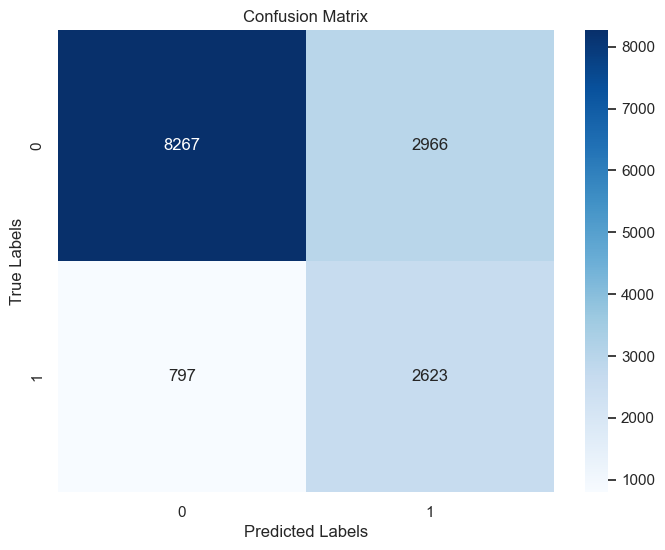

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


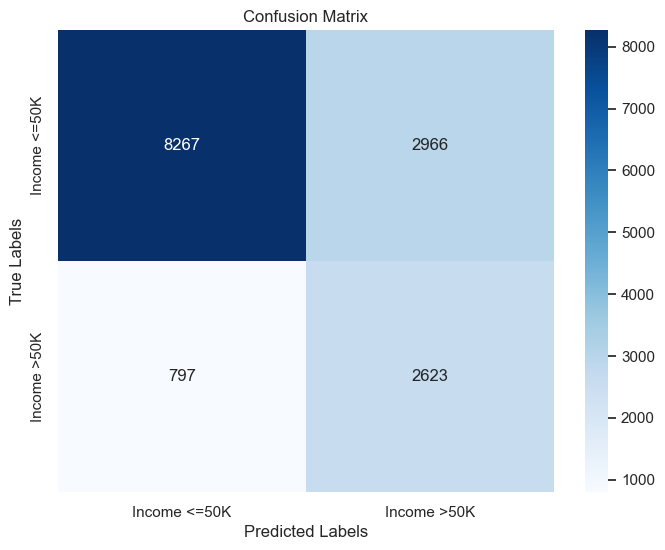

In [51]:
# Define class labels
class_labels = ['Income <=50K', 'Income >50K']

# Plot confusion matrix with custom class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


    Random Forest
    

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)




Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     11233
           1       0.65      0.67      0.66      3420

    accuracy                           0.84     14653
   macro avg       0.77      0.78      0.78     14653
weighted avg       0.84      0.84      0.84     14653

Accuracy - Random Forest Classifier: 0.8383948679451307


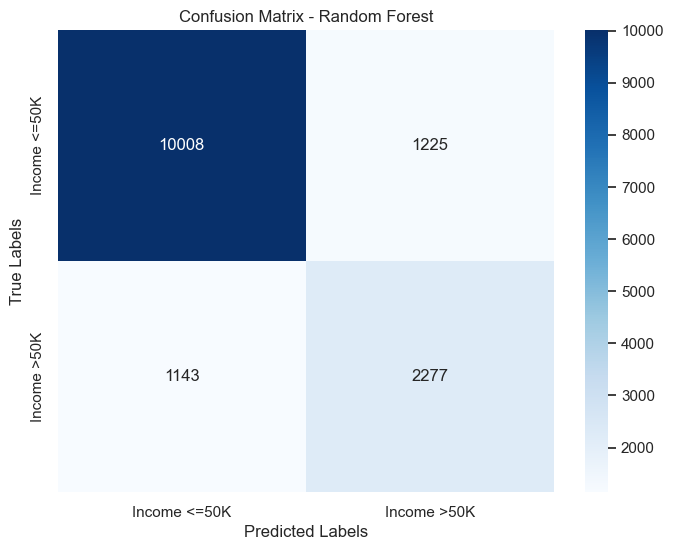

In [53]:
# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
random_forest_classification_report = classification_report(y_test, y_pred_rf)
from sklearn.metrics import accuracy_score

# Calculate accuracy score for Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy - Random Forest Classifier:", accuracy_rf)

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [54]:
# Calculate precision
precision_rf = precision_score(y_test, y_pred_rf)

# Calculate recall
recall_rf = recall_score(y_test, y_pred_rf)

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print("Precision - Random Forest Classifier:", precision_rf)
print("Recall - Random Forest Classifier:", recall_rf)
print("F1-score - Random Forest Classifier:", f1_rf)

Precision - Random Forest Classifier: 0.6501998857795546
Recall - Random Forest Classifier: 0.6657894736842105
F1-score - Random Forest Classifier: 0.6579023403640566


support vector machine

Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     11233
           1       0.80      0.18      0.29      3420

    accuracy                           0.80     14653
   macro avg       0.80      0.58      0.58     14653
weighted avg       0.80      0.80      0.74     14653

Accuracy - Support Vector Machine Classifier: 0.7971746400054597
Confusion Matrix - Support Vector Machine Classifier:


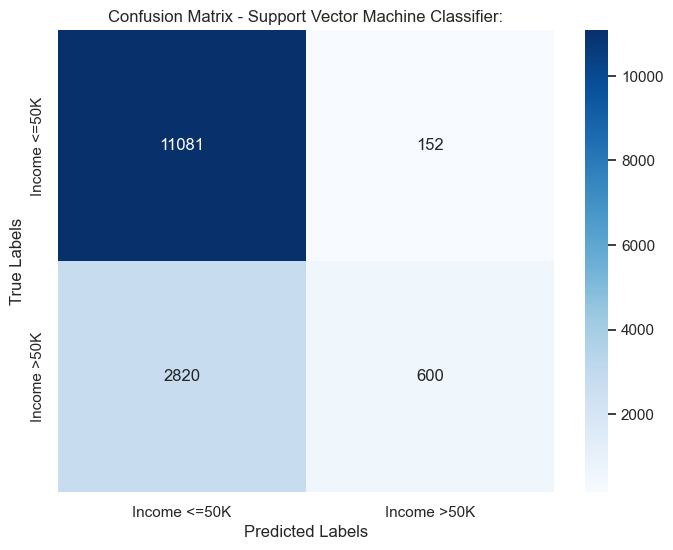

Precision - Support Vector Machine Classifier: 0.7978723404255319
Recall - Support Vector Machine Classifier: 0.17543859649122806
F1-score - Support Vector Machine Classifier: 0.28763183125599234


In [55]:
from sklearn.svm import SVC

# Create SVM classifier
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))
svm_classification_report = classification_report(y_test, y_pred_svm)

# Calculate accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy - Support Vector Machine Classifier:", accuracy_svm)

# Print confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix - Support Vector Machine Classifier:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Support Vector Machine Classifier:")
plt.show()

# Calculate precision
precision_svm = precision_score(y_test, y_pred_svm)

# Calculate recall
recall_svm = recall_score(y_test, y_pred_svm)

# Calculate F1-score
f1_svm = f1_score(y_test, y_pred_svm)

# Print the results
print("Precision - Support Vector Machine Classifier:", precision_svm)
print("Recall - Support Vector Machine Classifier:", recall_svm)
print("F1-score - Support Vector Machine Classifier:", f1_svm)


decision Tree classifier


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     11233
           1       0.55      0.63      0.58      3420

    accuracy                           0.79     14653
   macro avg       0.71      0.73      0.72     14653
weighted avg       0.80      0.79      0.80     14653

Accuracy - Decision Tree Classifier: 0.7923974612707295
Confusion Matrix - Decision Tree Classifier:


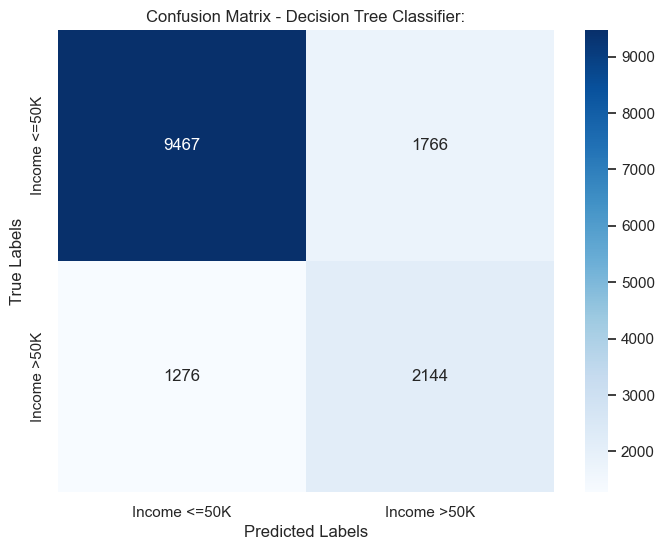

Precision - Decision Tree Classifier: 0.5483375959079284
Recall - Decision Tree Classifier: 0.6269005847953216
F1-score - Decision Tree Classifier: 0.5849931787175989


In [56]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
decision_tree_classification_report = classification_report(y_test, y_pred_dt)
# Calculate accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy - Decision Tree Classifier:", accuracy_dt)

# Print confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix - Decision Tree Classifier:")
#conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Decision Tree Classifier:")
plt.show()

# Calculate precision
precision_dt = precision_score(y_test, y_pred_dt)

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt)

# Calculate F1-score
f1_dt = f1_score(y_test, y_pred_dt)

# Print the results
print("Precision - Decision Tree Classifier:", precision_dt)
print("Recall - Decision Tree Classifier:", recall_dt)
print("F1-score - Decision Tree Classifier:", f1_dt)

lightgbm

[LightGBM] [Info] Number of positive: 25922, number of negative: 25922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 51844, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classifier:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     11233
           1       0.68      0.71      0.69      3420

    accuracy                           0.85     14653
   macro avg       0.79      0.80      0.80     14653
weighted avg       0.86      0.85      0.86     14653

Accuracy - LightGBM Classifier: 0.8539548215382515


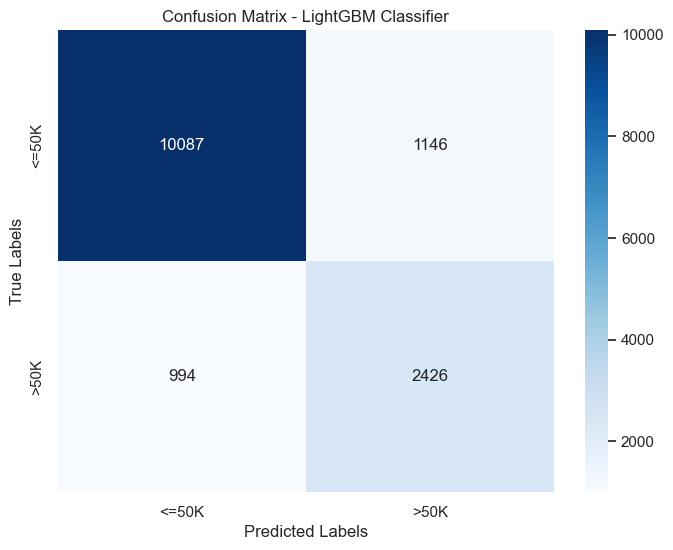

Precision - LightGBM Classifier: 0.6791713325867861
Recall - LightGBM Classifier: 0.7093567251461989
F1-score - LightGBM Classifier: 0.6939359267734554


In [57]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Create LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the model
print("LightGBM Classifier:")
print(classification_report(y_test, y_pred_lgb))
lightgbm_classification_report =classification_report(y_test, y_pred_lgb)
# Calculate accuracy score
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("Accuracy - LightGBM Classifier:", accuracy_lgb)

# Print confusion matrix as heatmap
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - LightGBM Classifier")
plt.show()


# Calculate precision
precision_lgb = precision_score(y_test, y_pred_lgb)

# Calculate recall
recall_lgb = recall_score(y_test, y_pred_lgb)

# Calculate F1-score
f1_lgb = f1_score(y_test, y_pred_lgb)

# Print the results
print("Precision - LightGBM Classifier:", precision_lgb)
print("Recall - LightGBM Classifier:", recall_lgb)
print("F1-score - LightGBM Classifier:", f1_lgb)

naive bayes

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     11233
           1       0.67      0.29      0.41      3420

    accuracy                           0.80     14653
   macro avg       0.74      0.63      0.64     14653
weighted avg       0.78      0.80      0.77     14653

Accuracy - Naive Bayes Classifier: 0.8012693646352282


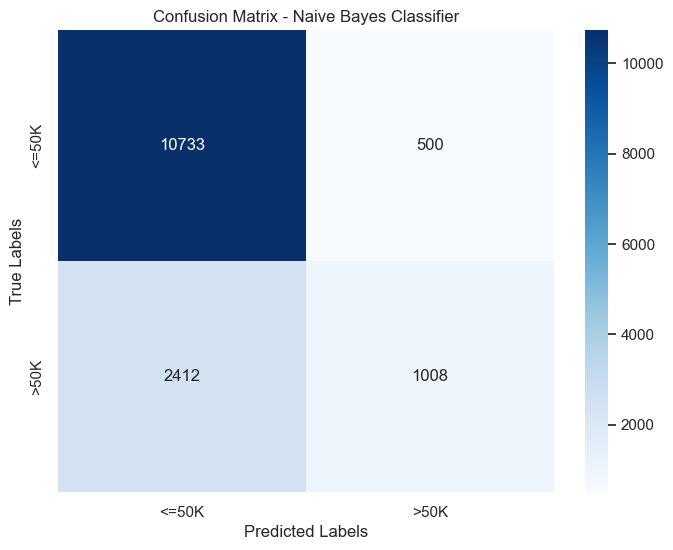

Precision - Naive Bayes Classifier: 0.6684350132625995
Recall - Naive Bayes Classifier: 0.29473684210526313
F1-score - Naive Bayes Classifier: 0.4090909090909091


In [58]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
naive_bayes_classification_report = classification_report(y_test, y_pred_nb)
# Calculate accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy - Naive Bayes Classifier:", accuracy_nb)

# Print confusion matrix as heatmap
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.show()


# Calculate precision
precision_nb = precision_score(y_test, y_pred_nb)

# Calculate recall
recall_nb = recall_score(y_test, y_pred_nb)

# Calculate F1-score
f1_nb = f1_score(y_test, y_pred_nb)

# Print the results
print("Precision - Naive Bayes Classifier:", precision_nb)
print("Recall - Naive Bayes Classifier:", recall_nb)
print("F1-score - Naive Bayes Classifier:", f1_nb)

Gradient Boosting Classifer


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     11233
           1       0.62      0.73      0.67      3420

    accuracy                           0.83     14653
   macro avg       0.77      0.80      0.78     14653
weighted avg       0.84      0.83      0.84     14653

Accuracy - Gradient Boosting Classifier: 0.8340271616733774


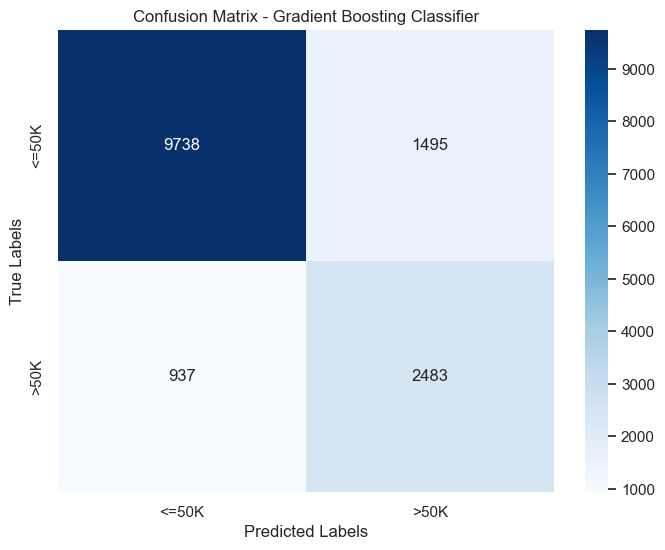

Precision - Gradient Boosting Classifier: 0.6241830065359477
Recall - Gradient Boosting Classifier: 0.7260233918128655
F1-score - Gradient Boosting Classifier: 0.6712625033792917


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))
gradient_boosting_classification_report =classification_report(y_test, y_pred_gb)
# Calculate accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy - Gradient Boosting Classifier:", accuracy_gb)

# Print confusion matrix as heatmap
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()


# Calculate precision
precision_gb = precision_score(y_test, y_pred_gb)

# Calculate recall
recall_gb = recall_score(y_test, y_pred_gb)

# Calculate F1-score
f1_gb = f1_score(y_test, y_pred_gb)

# Print the results
print("Precision - Gradient Boosting Classifier:", precision_gb)
print("Recall - Gradient Boosting Classifier:", recall_gb)
print("F1-score - Gradient Boosting Classifier:", f1_gb)


ada boost

C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     11233
           1       0.57      0.77      0.65      3420

    accuracy                           0.81     14653
   macro avg       0.74      0.79      0.76     14653
weighted avg       0.84      0.81      0.82     14653

Accuracy - AdaBoost Classifier: 0.8100047771787348


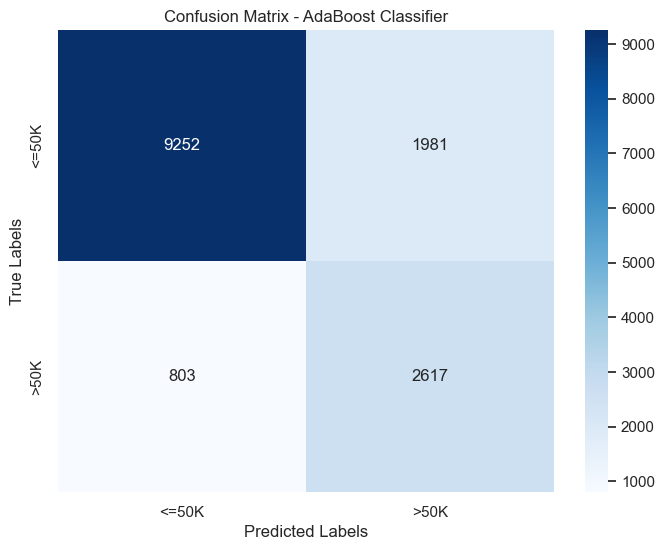

Precision - AdaBoost Classifier: 0.5691605045672031
Recall - AdaBoost Classifier: 0.7652046783625731
F1-score - AdaBoost Classifier: 0.6527812422050386


In [60]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the model
print("AdaBoost Classifier:")
print(classification_report(y_test, y_pred_adaboost))
adaboost_classification_report =classification_report(y_test, y_pred_adaboost)
# Calculate accuracy score
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy - AdaBoost Classifier:", accuracy_adaboost)

# Print confusion matrix as heatmap
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


# Calculate precision
precision_adaboost = precision_score(y_test, y_pred_adaboost)

# Calculate recall
recall_adaboost = recall_score(y_test, y_pred_adaboost)

# Calculate F1-score
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Print the results
print("Precision - AdaBoost Classifier:", precision_adaboost)
print("Recall - AdaBoost Classifier:", recall_adaboost)
print("F1-score - AdaBoost Classifier:", f1_adaboost)


In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the testing data
y_pred_ab = adaboost_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)

# Print the evaluation metrics
print("Accuracy (AdaBoost):", accuracy_ab)
print("Precision (AdaBoost):", precision_ab)
print("Recall (AdaBoost):", recall_ab)
print("F1-Score (AdaBoost):", f1_ab)


C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (AdaBoost): 0.8100047771787348
Precision (AdaBoost): 0.5691605045672031
Recall (AdaBoost): 0.7652046783625731
F1-Score (AdaBoost): 0.6527812422050386


xg boost

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     11233
           1       0.68      0.69      0.69      3420

    accuracy                           0.85     14653
   macro avg       0.79      0.80      0.79     14653
weighted avg       0.85      0.85      0.85     14653

Accuracy - XGBoost Classifier: 0.8523851770968403


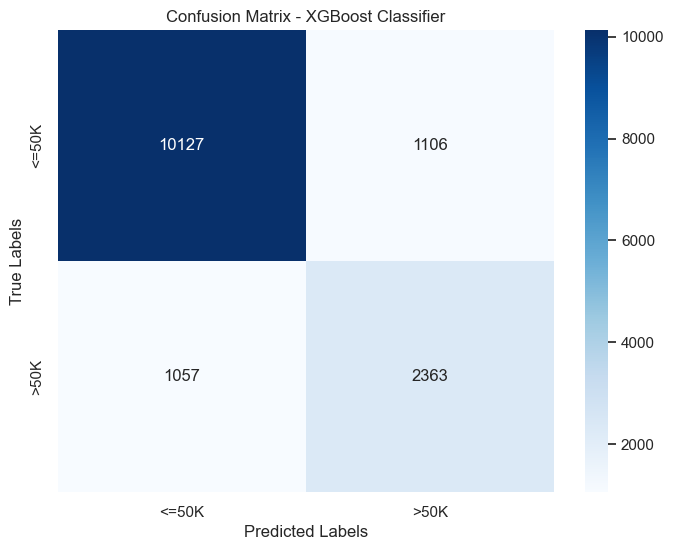

Precision - XGBoost Classifier: 0.6811761314499856
Recall - XGBoost Classifier: 0.6909356725146198
F1-score - XGBoost Classifier: 0.6860211932065612


In [62]:
import xgboost as xgb

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))
xgboost_classification_report = classification_report(y_test, y_pred_xgb)
# Calculate accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy - XGBoost Classifier:", accuracy_xgb)

# Print confusion matrix as heatmap
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall_xgb = recall_score(y_test, y_pred_xgb)

# Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the results
print("Precision - XGBoost Classifier:", precision_xgb)
print("Recall - XGBoost Classifier:", recall_xgb)
print("F1-score - XGBoost Classifier:", f1_xgb)

K Nearest Neighbors

K Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.83      0.69      0.76     11233
           1       0.35      0.54      0.43      3420

    accuracy                           0.66     14653
   macro avg       0.59      0.62      0.59     14653
weighted avg       0.72      0.66      0.68     14653

Accuracy - K Nearest Neighbors Classifier: 0.6575445301303487


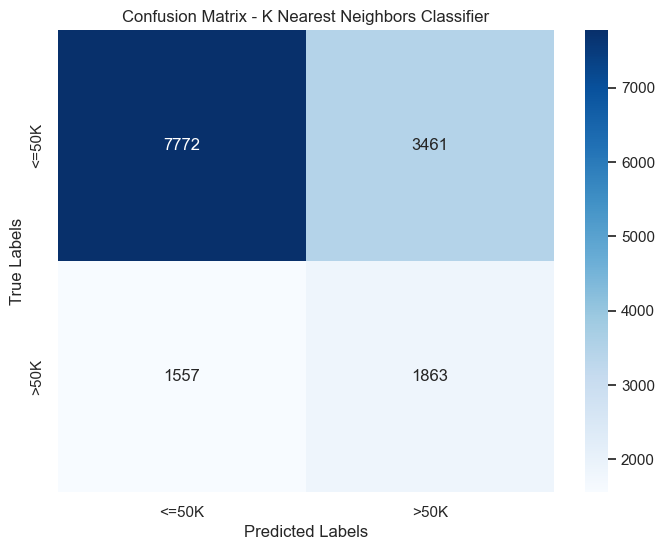

Precision - K Nearest Neighbors Classifier: 0.34992486851990984
Recall - K Nearest Neighbors Classifier: 0.5447368421052632
F1-score - K Nearest Neighbors Classifier: 0.42612076852698993


In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Create K Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
print("K Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
k_nearest_classifier_classification_report = classification_report(y_test, y_pred_knn)
# Calculate accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy - K Nearest Neighbors Classifier:", accuracy_knn)

# Print confusion matrix as heatmap
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - K Nearest Neighbors Classifier")
plt.show()



# Calculate precision
precision_knn = precision_score(y_test, y_pred_knn)

# Calculate recall
recall_knn = recall_score(y_test, y_pred_knn)

# Calculate F1-score
f1_knn = f1_score(y_test, y_pred_knn)

# Print the results
print("Precision - K Nearest Neighbors Classifier:", precision_knn)
print("Recall - K Nearest Neighbors Classifier:", recall_knn)
print("F1-score - K Nearest Neighbors Classifier:", f1_knn)

 Bagging classifier)

Bagging Classifier:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11233
           1       0.64      0.61      0.63      3420

    accuracy                           0.83     14653
   macro avg       0.76      0.75      0.76     14653
weighted avg       0.83      0.83      0.83     14653

Accuracy - Bagging Classifier: 0.8293182283491435


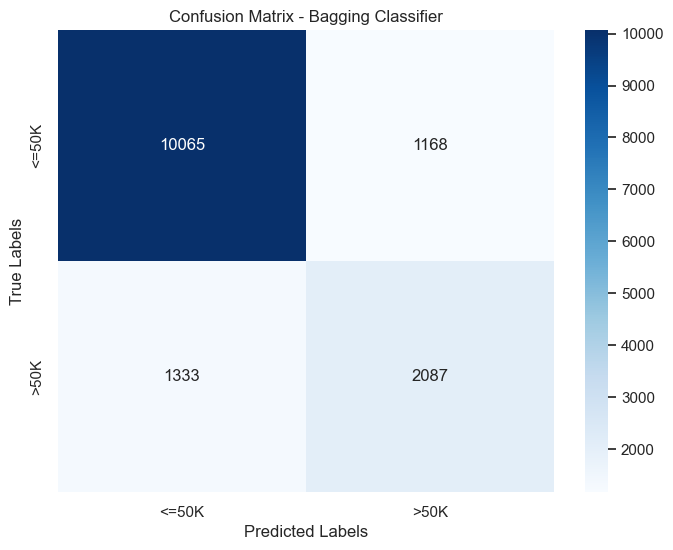

Precision - Bagging Classifier: 0.6411674347158218
Recall - Bagging Classifier: 0.610233918128655
F1-score - Bagging Classifier: 0.6253183520599251


In [64]:
from sklearn.ensemble import BaggingClassifier

# Create Bagging classifier
bagging_classifier = BaggingClassifier(random_state=42)

# Train the model
bagging_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model
print("Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))
bagging_classifier_classification_report =classification_report(y_test, y_pred_bagging)
# Calculate accuracy score
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy - Bagging Classifier:", accuracy_bagging)

# Print confusion matrix as heatmap
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()


# Calculate precision
precision_bagging = precision_score(y_test, y_pred_bagging)

# Calculate recall
recall_bagging = recall_score(y_test, y_pred_bagging)

# Calculate F1-score
f1_bagging = f1_score(y_test, y_pred_bagging)

# Print the results
print("Precision - Bagging Classifier:", precision_bagging)
print("Recall - Bagging Classifier:", recall_bagging)
print("F1-score - Bagging Classifier:", f1_bagging)

EVALUATION AND GRAPHS

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Support Vector Machine'),
  Text(3, 0, 'Decision Tree'),
  Text(4, 0, 'LightGBM'),
  Text(5, 0, 'Naive Bayes'),
  Text(6, 0, 'Gradient Boosting'),
  Text(7, 0, 'AdaBoost'),
  Text(8, 0, 'XGBoost'),
  Text(9, 0, 'K Nearest Neighbors'),
  Text(10, 0, 'Bagging Classifier')])

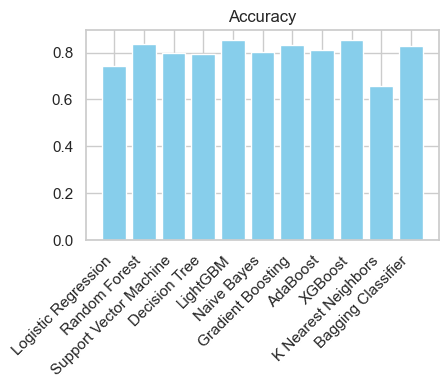

In [65]:
import matplotlib.pyplot as plt


# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_ab, accuracy_xgb, accuracy_knn, accuracy_bagging]
#precisions = [precision_logistic, precision_rf, precision_svm, precision_dt, precision_lgb, precision_nb, precision_gb, precision_ab, precision_xgb, precision_knn, precision_bagging]
#recalls = [recall_logistic, recall_rf, recall_svm, recall_dt, recall_lgb, recall_nb, recall_gb, recall_ab, recall_xgb, recall_knn, recall_bagging]
#f1_scores = [f1_logistic, f1_rf, f1_svm, f1_dt, f1_lgb, f1_nb, f1_gb, f1_ab, f1_xgb, f1_knn, f1_bagging]

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

#Precision
#plt.subplot(2, 2, 2)
#plt.bar(models, precisions, color='lightgreen')
#plt.title('Precision')
#plt.xticks(rotation=45, ha='right')

## Recall
#plt.subplot(2, 2, 3)
#plt.bar(models, recalls, color='salmon')
#plt.title('Recall')
#plt.xticks(rotation=45, ha='right')
#
## F1-score
#plt.subplot(2, 2, 4)
#plt.bar(models, f1_scores, color='gold')
#plt.title('F1-Score')
#plt.xticks(rotation=45, ha='right')
#
#plt.tight_layout()
#plt.show()


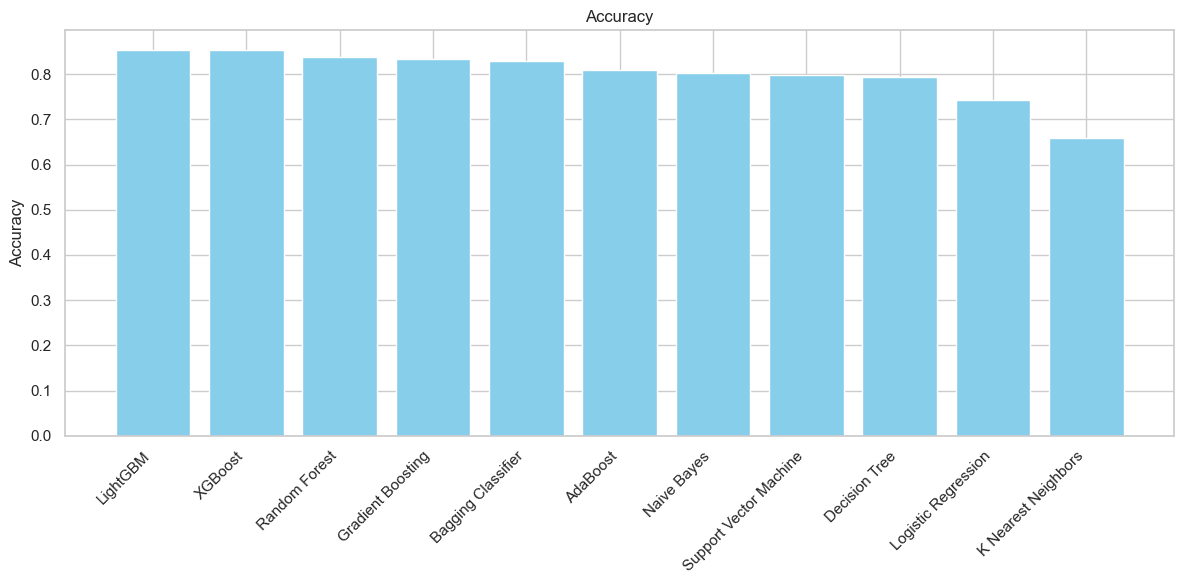

In [66]:
import matplotlib.pyplot as plt

# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_ab, accuracy_xgb, accuracy_knn, accuracy_bagging]

# Sort models and accuracies based on accuracies
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))

# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_accuracies, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#
## Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest','Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf,accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_adaboost, accuracy_xgb, accuracy_knn, accuracy_bagging]
precisions = [precision_logistic, precision_rf,precision_svm ,precision_dt, precision_lgb, precision_nb, precision_gb, precision_adaboost, precision_xgb, precision_knn, precision_bagging]
recalls = [recall_logistic, recall_rf, recall_dt,recall_svm ,recall_lgb, recall_nb, recall_gb, recall_adaboost, recall_xgb, recall_knn, recall_bagging]
f1_scores = [f1_logistic, f1_rf, f1_dt,f1_svm, f1_lgb, f1_nb, f1_gb, f1_adaboost, f1_xgb, f1_knn, f1_bagging]
#
## Sort models and metrics based on F1-score
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))
sorted_models, sorted_precisions = zip(*sorted(zip(models, precisions), key=lambda x: x[1], reverse=True))
sorted_models, sorted_recalls = zip(*sorted(zip(models, recalls), key=lambda x: x[1], reverse=True))
sorted_models, sorted_f1_scores = zip(*sorted(zip(models, f1_scores), key=lambda x: x[1], reverse=True))
#
## Plotting the evaluation metrics
#plt.figure(figsize=(15, 12))
#
## Accuracy
#plt.subplot(4, 1, 1)
#plt.bar(sorted_models, sorted_accuracies, color='lightcoral')
#plt.title('Accuracy')
#plt.xticks(rotation=45, ha='right')
#
## Precision
#plt.subplot(4, 1, 2)
#plt.bar(sorted_models, sorted_precisions, color='skyblue')
#plt.title('Precision')
#plt.xticks(rotation=45, ha='right')
#
## Recall
#plt.subplot(4, 1, 3)
#plt.bar(sorted_models, sorted_recalls, color='salmon')
#plt.title('Recall')
#plt.xticks(rotation=45, ha='right')
#
## F1-score
#plt.subplot(4, 1, 4)
#plt.bar(sorted_models, sorted_f1_scores, color='lightgreen')
#plt.title('F1-score')
#plt.xticks(rotation=45, ha='right')
#
#plt.tight_layout()
#plt.show()


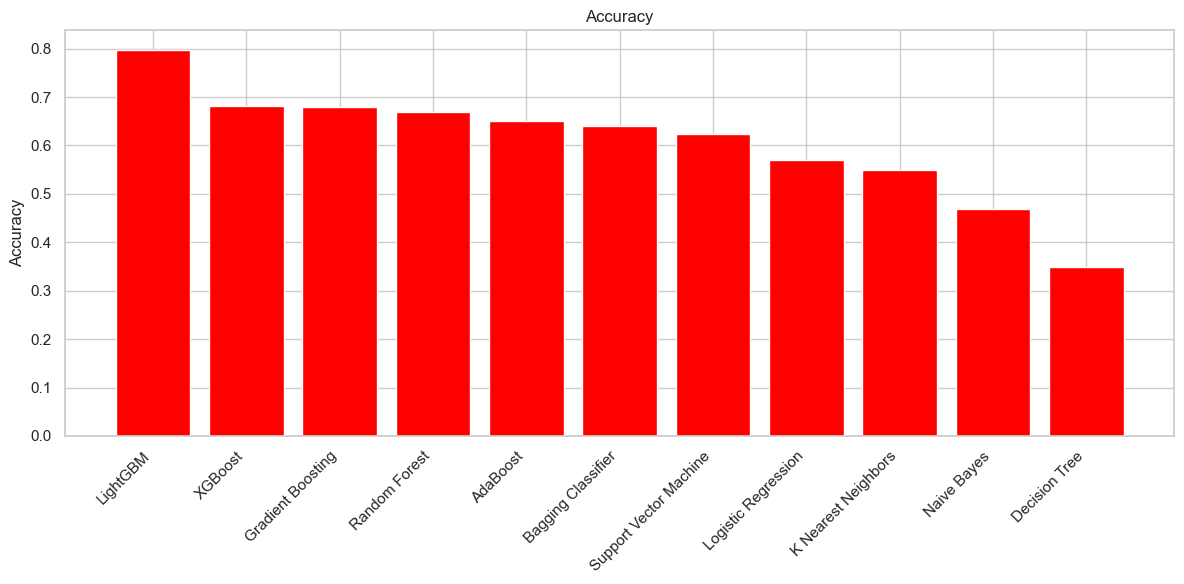

In [68]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_precisions, color='red')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

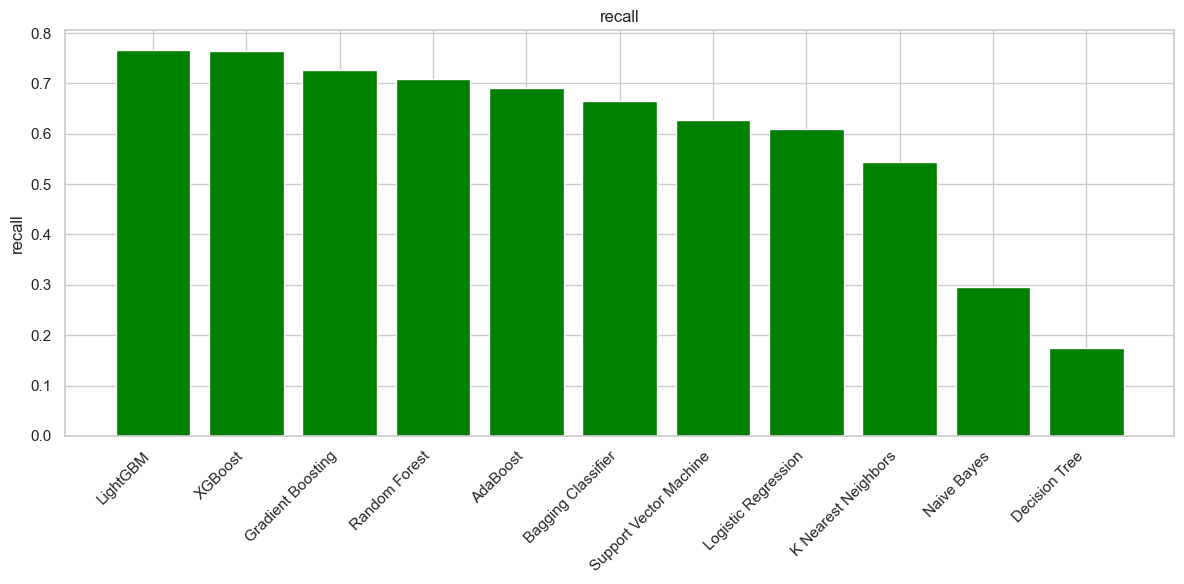

In [69]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_recalls, color='green')
plt.title('recall')
plt.xticks(rotation=45, ha='right')
plt.ylabel('recall')

plt.tight_layout()
plt.show()

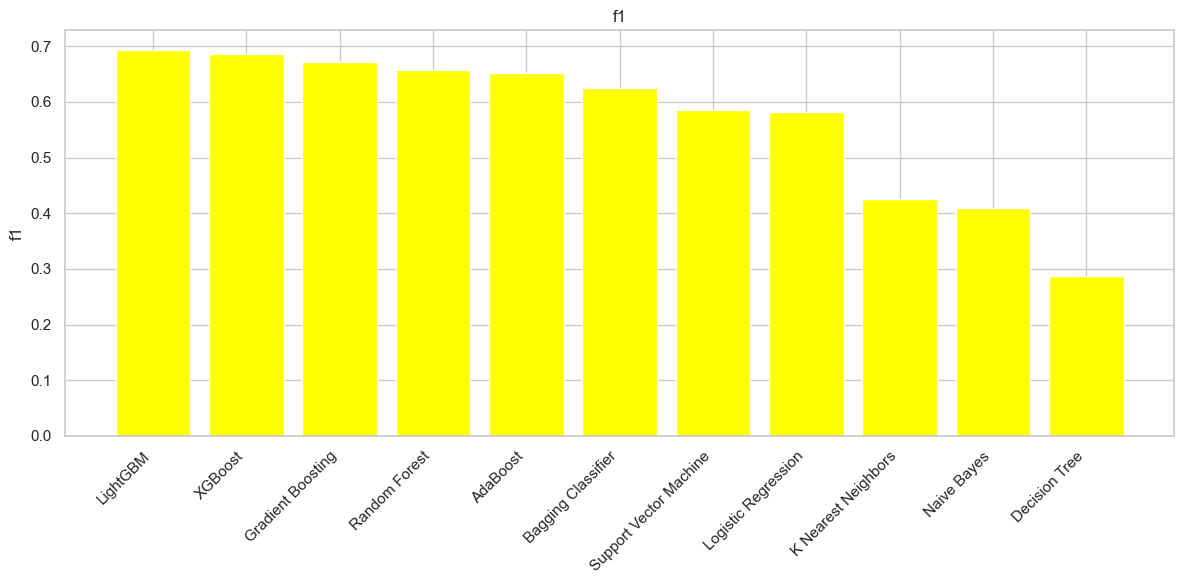

In [70]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_f1_scores, color='Yellow')
plt.title('f1')
plt.xticks(rotation=45, ha='right')
plt.ylabel('f1')

plt.tight_layout()
plt.show()

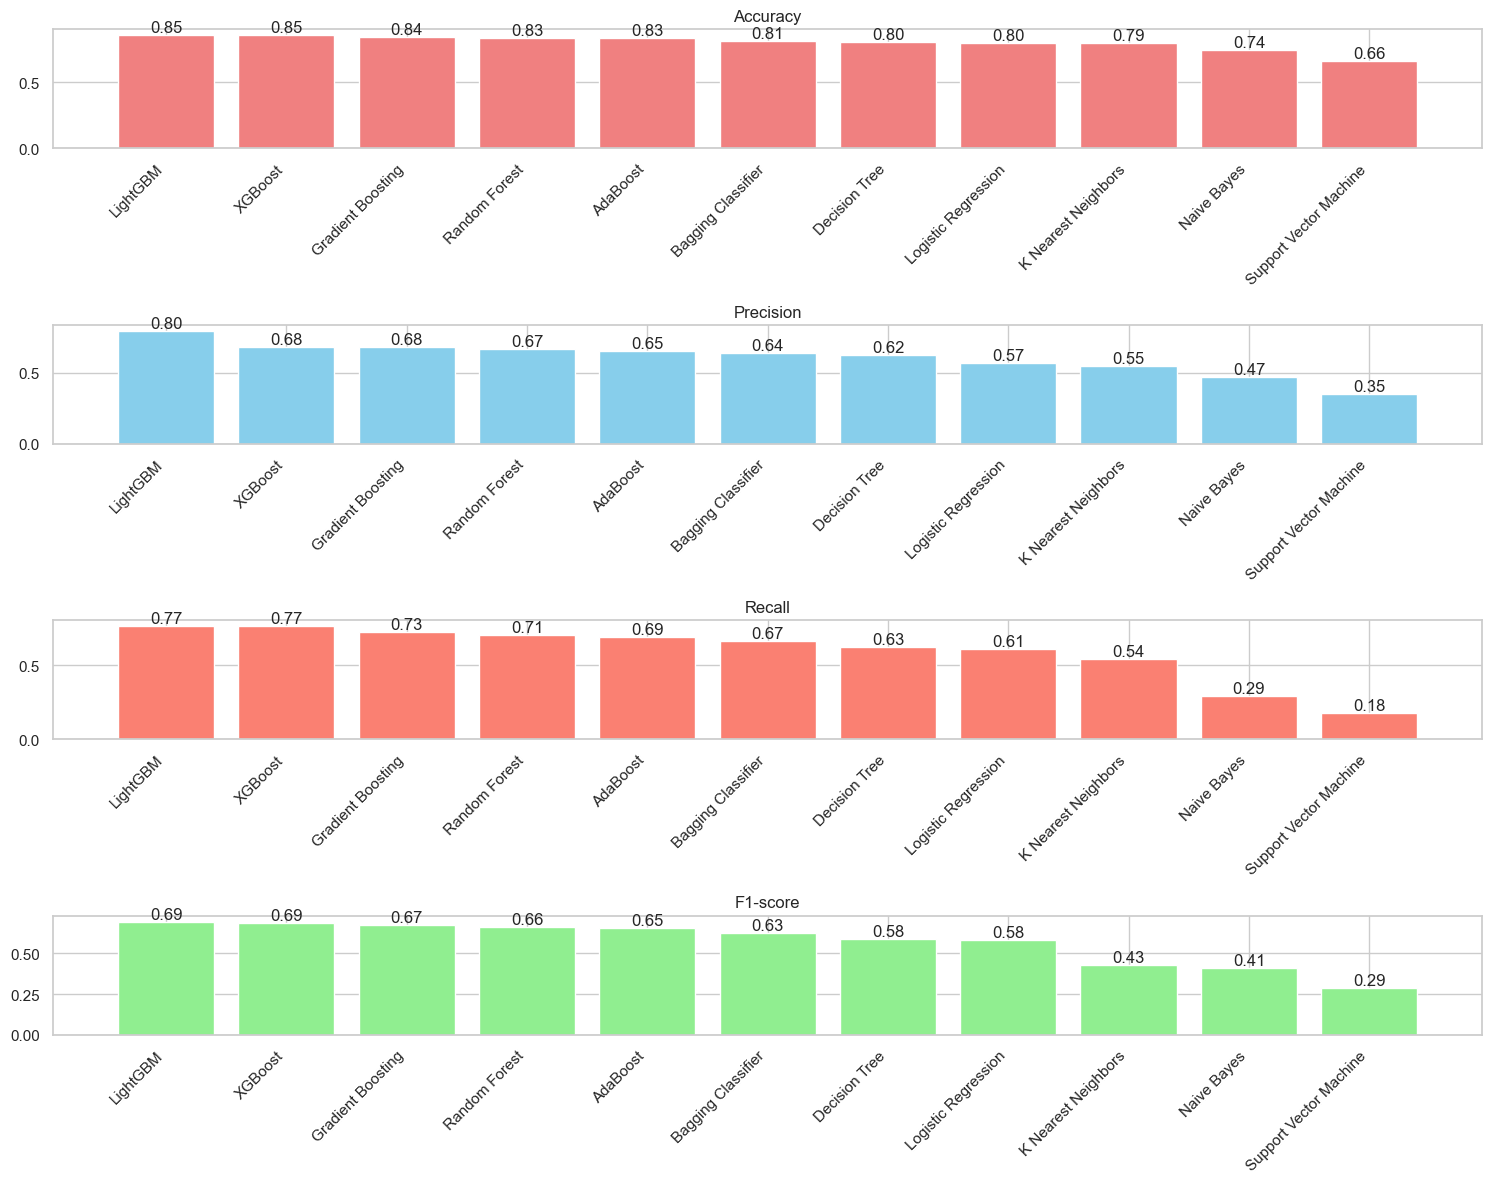

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest','Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf,accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_adaboost, accuracy_xgb, accuracy_knn, accuracy_bagging]
precisions = [precision_logistic, precision_rf,precision_svm, precision_dt, precision_lgb, precision_nb, precision_gb, precision_adaboost, precision_xgb, precision_knn, precision_bagging]
recalls = [recall_logistic, recall_rf, recall_dt,recall_svm, recall_lgb, recall_nb, recall_gb, recall_adaboost, recall_xgb, recall_knn, recall_bagging]
f1_scores = [f1_logistic, f1_rf,f1_svm, f1_dt, f1_lgb, f1_nb, f1_gb, f1_adaboost, f1_xgb, f1_knn, f1_bagging]

# Sort models and metrics based on F1-score
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))
sorted_models, sorted_precisions = zip(*sorted(zip(models, precisions), key=lambda x: x[1], reverse=True))
sorted_models, sorted_recalls = zip(*sorted(zip(models, recalls), key=lambda x: x[1], reverse=True))
sorted_models, sorted_f1_scores = zip(*sorted(zip(models, f1_scores), key=lambda x: x[1], reverse=True))

# Plotting the evaluation metrics
plt.figure(figsize=(15, 12))

# Accuracy
plt.subplot(4, 1, 1)
bars = plt.bar(sorted_models, sorted_accuracies, color='lightcoral')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

for bar, acc in zip(bars, sorted_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom')

# Precision
plt.subplot(4, 1, 2)
bars = plt.bar(sorted_models, sorted_precisions, color='skyblue')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

for bar, prec in zip(bars, sorted_precisions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{prec:.2f}', ha='center', va='bottom')

# Recall
plt.subplot(4, 1, 3)
bars = plt.bar(sorted_models, sorted_recalls, color='salmon')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

for bar, rec in zip(bars, sorted_recalls):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rec:.2f}', ha='center', va='bottom')

# F1-score
plt.subplot(4, 1, 4)
bars = plt.bar(sorted_models, sorted_f1_scores, color='lightgreen')
plt.title('F1-score')
plt.xticks(rotation=45, ha='right')

for bar, f1 in zip(bars, sorted_f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{f1:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [72]:
all_classification_report=[logistic_regression_classification_report,
random_forest_classification_report ,
decision_tree_classification_report ,
lightgbm_classification_report ,
naive_bayes_classification_report,
gradient_boosting_classification_report, 
adaboost_classification_report ,
xgboost_classification_report ,
k_nearest_classifier_classification_report]



In [73]:
all_classification_report = {
    'logistic_regression': logistic_regression_classification_report,
    'random_forest': random_forest_classification_report,
    'decision_tree': decision_tree_classification_report,
    'lightgbm': lightgbm_classification_report,
    'naive_bayes': naive_bayes_classification_report,
    'gradient_boosting': gradient_boosting_classification_report,
    'adaboost': adaboost_classification_report,
    'xgboost': xgboost_classification_report,
    'k_nearest_classifier': k_nearest_classifier_classification_report
}

for name, report in all_classification_report.items():
    print(f"Variable name: {name}")
    print(report)


Variable name: logistic_regression
              precision    recall  f1-score   support

           0       0.91      0.74      0.81     11233
           1       0.47      0.77      0.58      3420

    accuracy                           0.74     14653
   macro avg       0.69      0.75      0.70     14653
weighted avg       0.81      0.74      0.76     14653

Variable name: random_forest
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     11233
           1       0.65      0.67      0.66      3420

    accuracy                           0.84     14653
   macro avg       0.77      0.78      0.78     14653
weighted avg       0.84      0.84      0.84     14653

Variable name: decision_tree
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     11233
           1       0.55      0.63      0.58      3420

    accuracy                           0.79     14653
   macro avg       0.71      0.73  

In [74]:
print(logistic_regression_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.74      0.81     11233
           1       0.47      0.77      0.58      3420

    accuracy                           0.74     14653
   macro avg       0.69      0.75      0.70     14653
weighted avg       0.81      0.74      0.76     14653

